   Linespeed  Extrspeed_1  Extrtemp_1  Extrtempbarr_1_1  Extrpressure_1_1  \
0   21.27899     5.498138    70.08289          42.12890          18.48597   
1   20.28009     7.369019    69.95557          45.85973          21.68692   
2   20.13654     7.366974    69.94476          44.37809          21.63629   
3   20.36981     7.369019    70.10267          42.21057          21.72309   
4   20.41766     7.369019    69.98849          45.74596          21.74479   

   Extrpressure_1_2  Extrtempstock_1           PLCtime  
0          41.82581             88.2  2004/10/23 11:07  
1          46.85149             88.3  2004/10/23 11:06  
2          46.33247             88.2  2004/10/23 11:05  
3          45.94003             88.2  2004/10/23 11:04  
4          45.54760             88.2  2004/10/23 11:03  


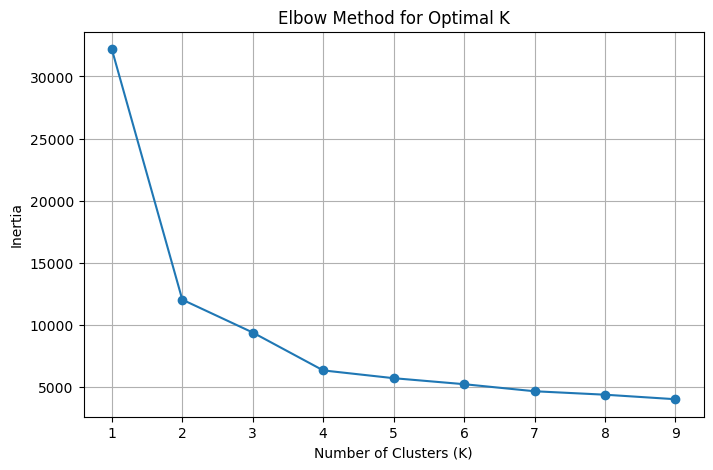

   Linespeed  Extrspeed_1  Extrtemp_1  Extrtempbarr_1_1  Extrpressure_1_1  \
0   21.27899     5.498138    70.08289          42.12890          18.48597   
1   20.28009     7.369019    69.95557          45.85973          21.68692   
2   20.13654     7.366974    69.94476          44.37809          21.63629   
3   20.36981     7.369019    70.10267          42.21057          21.72309   
4   20.41766     7.369019    69.98849          45.74596          21.74479   

   Extrpressure_1_2  Extrtempstock_1           PLCtime  Cluster  
0          41.82581             88.2  2004/10/23 11:07        1  
1          46.85149             88.3  2004/10/23 11:06        1  
2          46.33247             88.2  2004/10/23 11:05        1  
3          45.94003             88.2  2004/10/23 11:04        1  
4          45.54760             88.2  2004/10/23 11:03        1  


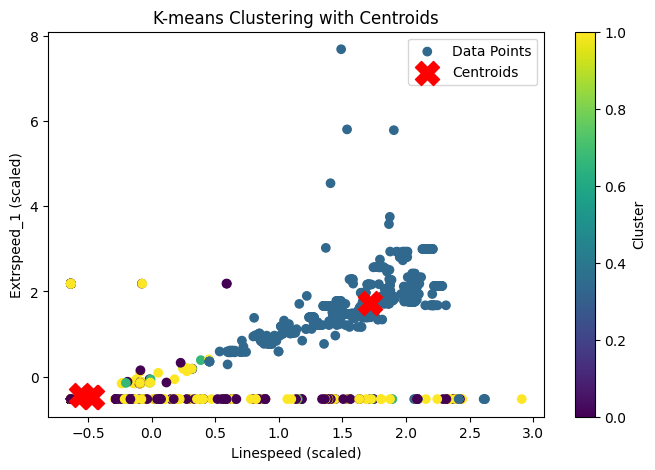

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with your actual file path
df = pd.read_csv('Data1.csv')

# Check the first few rows of the dataset
print(df.head())

# Select the features for clustering
features = df[['Linespeed', 'Extrspeed_1', 'Extrtemp_1', 
                'Extrtempbarr_1_1', 'Extrpressure_1_1', 
                'Extrpressure_1_2', 'Extrtempstock_1']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.grid()
plt.show()

# Choose the optimal number of clusters
optimal_k = 4  # or 5 based on your elbow method analysis

# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(features_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(df.head())

# Optionally, visualize the clusters if you have 2D or 3D data
plt.figure(figsize=(8, 5))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering with Centroids')
plt.xlabel('Linespeed (scaled)')
plt.ylabel('Extrspeed_1 (scaled)')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


   Extrspeed_2  Extrtemp_2  Extrtempbarr_2_1  Extrtempbarr_2_2  \
0     19.80286    64.72893          48.07814          61.06451   
1     24.19708    64.72111          51.35813          60.33286   
2     24.19922    64.73124          50.89591          58.29580   
3     24.20135    64.71081          48.71270          61.07571   
4     24.20135    64.70525          49.45546          60.41081   

   Extrpressure_2_1  Extrpressure_2_2  Extrtempstock_2           PLCtime  
0          42.87109          50.85358            112.4  2004/10/23 11:07  
1          45.69227          54.19198            111.2  2004/10/23 11:06  
2          45.95631          54.35474            110.7  2004/10/23 11:05  
3          46.14077          55.34577            113.0  2004/10/23 11:04  
4          45.78631          53.69647            112.4  2004/10/23 11:03  
Columns in DataFrame: Index(['Extrspeed_2', 'Extrtemp_2', 'Extrtempbarr_2_1', 'Extrtempbarr_2_2',
       'Extrpressure_2_1', 'Extrpressure_2_2', 'Extrtem

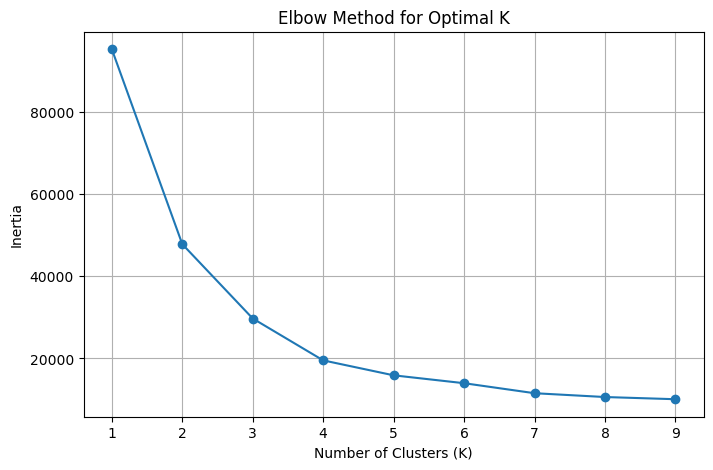

   Extrspeed_2  Extrtemp_2  Extrtempbarr_2_1  Extrtempbarr_2_2  \
0     19.80286    64.72893          48.07814          61.06451   
1     24.19708    64.72111          51.35813          60.33286   
2     24.19922    64.73124          50.89591          58.29580   
3     24.20135    64.71081          48.71270          61.07571   
4     24.20135    64.70525          49.45546          60.41081   

   Extrpressure_2_1  Extrpressure_2_2  Extrtempstock_2  Cluster  
0          42.87109          50.85358            112.4        1  
1          45.69227          54.19198            111.2        1  
2          45.95631          54.35474            110.7        1  
3          46.14077          55.34577            113.0        1  
4          45.78631          53.69647            112.4        1  


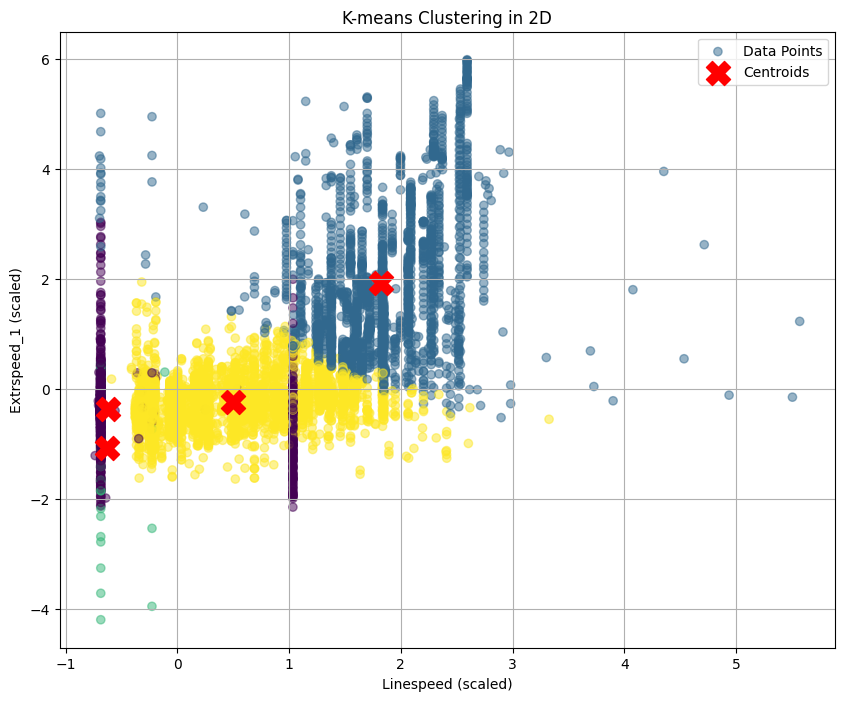

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with your actual file path
df = pd.read_csv('Data2.csv')

# Check the first few rows of the dataset and print column names
print(df.head())
print("Columns in DataFrame:", df.columns)

df.drop(["PLCtime"], axis=1, inplace=True)

# Clean up column names
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

# Select the features for clustering (including the new features)
features = df[['Extrspeed_2', 'Extrtemp_2', 
                'Extrtempbarr_2_1', 'Extrtempbarr_2_2', 
                'Extrpressure_2_1', 'Extrpressure_2_2', 
                'Extrtempstock_2']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.grid()
plt.show()

# Choose the optimal number of clusters
optimal_k = 4  # Adjust based on elbow method analysis

# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(features_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(df.head())

# 2D Visualization of the clusters
plt.figure(figsize=(10, 8))

# Choose two features for the 2D plot
x_index = 0  # 'Linespeed'
y_index = 1  # 'Extrspeed_1'

# Scatter plot for data points
plt.scatter(features_scaled[:, x_index], features_scaled[:, y_index], 
            c=df['Cluster'], cmap='viridis', label='Data Points', alpha=0.5)

# Scatter plot for centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, x_index], centroids[:, y_index], 
            s=300, c='red', marker='X', label='Centroids')

# Set labels and title
plt.title('K-means Clustering in 2D')
plt.xlabel('Linespeed (scaled)')
plt.ylabel('Extrspeed_1 (scaled)')
plt.legend()
plt.grid()

plt.show()


   Linespeed  Extrspeed_1  Extrtemp_1  Extrtempbarr_1_1  Extrpressure_1_1  \
0   21.27899     5.498138    70.08289          42.12890          18.48597   
1   20.28009     7.369019    69.95557          45.85973          21.68692   
2   20.13654     7.366974    69.94476          44.37809          21.63629   
3   20.36981     7.369019    70.10267          42.21057          21.72309   
4   20.41766     7.369019    69.98849          45.74596          21.74479   

   Extrpressure_1_2  Extrtempstock_1           PLCtime  
0          41.82581             88.2  2004/10/23 11:07  
1          46.85149             88.3  2004/10/23 11:06  
2          46.33247             88.2  2004/10/23 11:05  
3          45.94003             88.2  2004/10/23 11:04  
4          45.54760             88.2  2004/10/23 11:03  


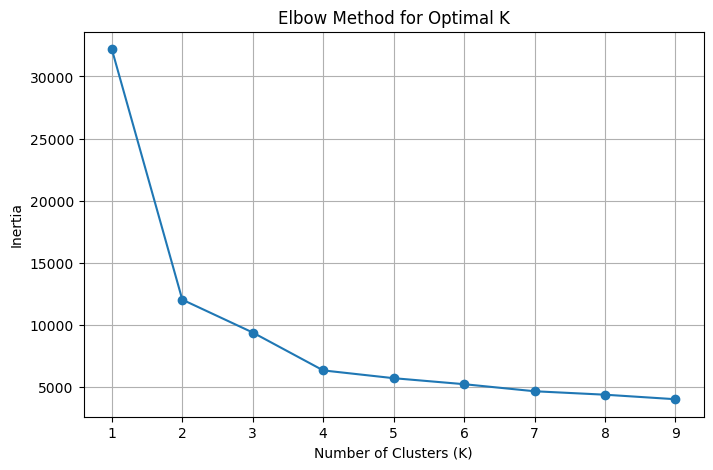

   Linespeed  Extrspeed_1  Extrtemp_1  Extrtempbarr_1_1  Extrpressure_1_1  \
0   21.27899     5.498138    70.08289          42.12890          18.48597   
1   20.28009     7.369019    69.95557          45.85973          21.68692   
2   20.13654     7.366974    69.94476          44.37809          21.63629   
3   20.36981     7.369019    70.10267          42.21057          21.72309   
4   20.41766     7.369019    69.98849          45.74596          21.74479   

   Extrpressure_1_2  Extrtempstock_1           PLCtime  Cluster  
0          41.82581             88.2  2004/10/23 11:07        1  
1          46.85149             88.3  2004/10/23 11:06        1  
2          46.33247             88.2  2004/10/23 11:05        1  
3          45.94003             88.2  2004/10/23 11:04        1  
4          45.54760             88.2  2004/10/23 11:03        1  


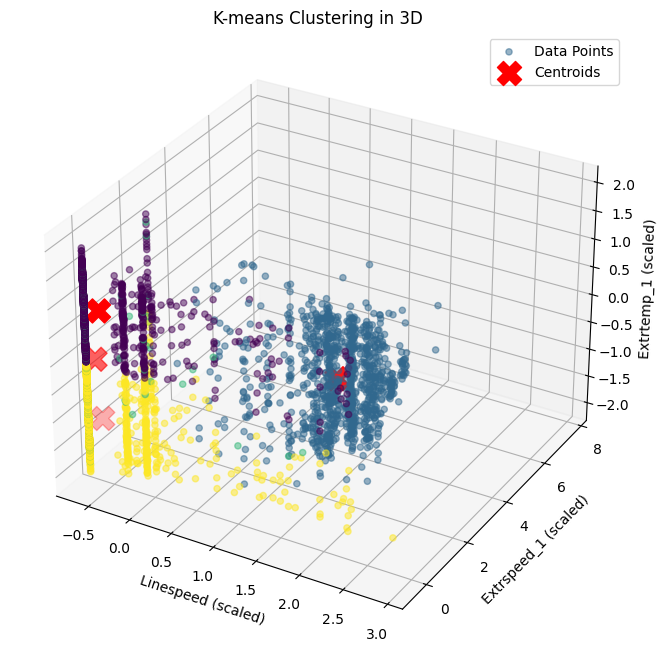

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset
# Replace 'your_dataset.csv' with your actual file path
df = pd.read_csv('Data1.csv')

# Check the first few rows of the dataset
print(df.head())

# Select the features for clustering
features = df[['Linespeed', 'Extrspeed_1', 'Extrtemp_1', 
                'Extrtempbarr_1_1', 'Extrpressure_1_1', 
                'Extrpressure_1_2', 'Extrtempstock_1']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.grid()
plt.show()

# Choose the optimal number of clusters
optimal_k = 4  # or 5 based on your elbow method analysis

# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(features_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(df.head())

# 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three features for the 3D plot
x_index = 0  # 'Linespeed'
y_index = 1  # 'Extrspeed_1'
z_index = 2  # 'Extrtemp_1'

# Scatter plot for data points
ax.scatter(features_scaled[:, x_index], features_scaled[:, y_index], features_scaled[:, z_index], 
           c=df['Cluster'], cmap='viridis', label='Data Points', alpha=0.5)

# Scatter plot for centroids
ax.scatter(kmeans.cluster_centers_[:, x_index], kmeans.cluster_centers_[:, y_index], 
           kmeans.cluster_centers_[:, z_index], s=300, c='red', marker='X', label='Centroids')

# Set labels for axes
ax.set_title('K-means Clustering in 3D')
ax.set_xlabel('Linespeed (scaled)')
ax.set_ylabel('Extrspeed_1 (scaled)')
ax.set_zlabel('Extrtemp_1 (scaled)')
ax.legend()

plt.show()


   Extrspeed_2  Extrtemp_2  Extrtempbarr_2_1  Extrtempbarr_2_2  \
0     19.80286    64.72893          48.07814          61.06451   
1     24.19708    64.72111          51.35813          60.33286   
2     24.19922    64.73124          50.89591          58.29580   
3     24.20135    64.71081          48.71270          61.07571   
4     24.20135    64.70525          49.45546          60.41081   

   Extrpressure_2_1  Extrpressure_2_2  Extrtempstock_2           PLCtime  
0          42.87109          50.85358            112.4  2004/10/23 11:07  
1          45.69227          54.19198            111.2  2004/10/23 11:06  
2          45.95631          54.35474            110.7  2004/10/23 11:05  
3          46.14077          55.34577            113.0  2004/10/23 11:04  
4          45.78631          53.69647            112.4  2004/10/23 11:03  


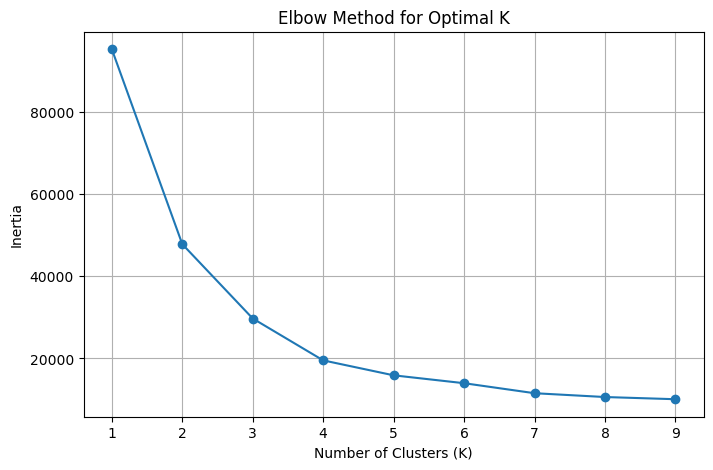

   Extrspeed_2  Extrtemp_2  Extrtempbarr_2_1  Extrtempbarr_2_2  \
0     19.80286    64.72893          48.07814          61.06451   
1     24.19708    64.72111          51.35813          60.33286   
2     24.19922    64.73124          50.89591          58.29580   
3     24.20135    64.71081          48.71270          61.07571   
4     24.20135    64.70525          49.45546          60.41081   

   Extrpressure_2_1  Extrpressure_2_2  Extrtempstock_2           PLCtime  \
0          42.87109          50.85358            112.4  2004/10/23 11:07   
1          45.69227          54.19198            111.2  2004/10/23 11:06   
2          45.95631          54.35474            110.7  2004/10/23 11:05   
3          46.14077          55.34577            113.0  2004/10/23 11:04   
4          45.78631          53.69647            112.4  2004/10/23 11:03   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


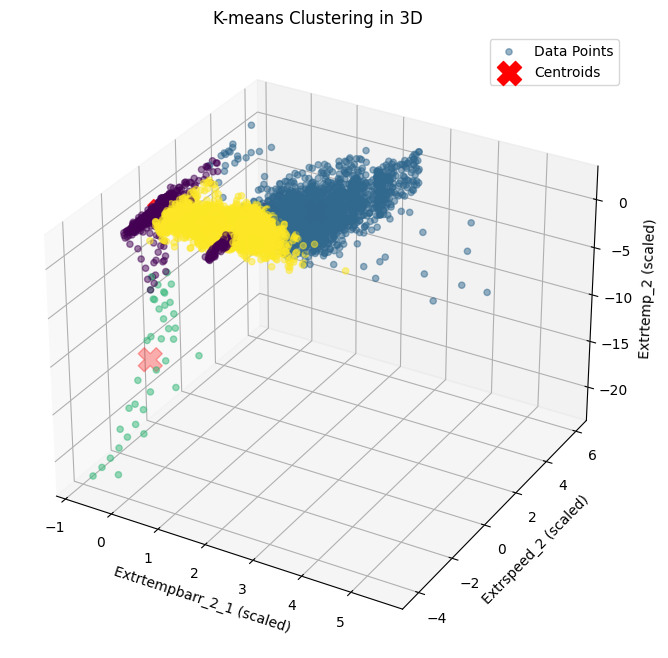

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset
# Replace 'your_dataset.csv' with your actual file path
df = pd.read_csv('Data2.csv')

# Check the first few rows of the dataset
print(df.head())

# Select the features for clustering
features = df[['Extrspeed_2', 'Extrtemp_2', 
                'Extrtempbarr_2_1', 'Extrtempbarr_2_2', 
                'Extrpressure_2_1', 'Extrpressure_2_2', 
                'Extrtempstock_2']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.grid()
plt.show()

# Choose the optimal number of clusters
optimal_k = 4  # or 5 based on your elbow method analysis

# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(features_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
print(df.head())

# 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three features for the 3D plot
x_index = 0  # 'Linespeed'
y_index = 1  # 'Extrspeed_1'
z_index = 2  # 'Extrtemp_1'

# Scatter plot for data points
ax.scatter(features_scaled[:, x_index], features_scaled[:, y_index], features_scaled[:, z_index], 
           c=df['Cluster'], cmap='viridis', label='Data Points', alpha=0.5)

# Scatter plot for centroids
ax.scatter(kmeans.cluster_centers_[:, x_index], kmeans.cluster_centers_[:, y_index], 
           kmeans.cluster_centers_[:, z_index], s=300, c='red', marker='X', label='Centroids')

# Set labels for axes
ax.set_title('K-means Clustering in 3D')
ax.set_xlabel('Extrtempbarr_2_1 (scaled)')
ax.set_ylabel( 'Extrspeed_2 (scaled)')
ax.set_zlabel('Extrtemp_2 (scaled)')
ax.legend()

plt.show()
